Cities and their Rainiest months

In [ ]:
import pandas as pd
import altair as alt
import plotly as pl
from vega_datasets import data
wth = pd.read_csv('weather.csv')ss
print(wth)

         city        lat         lon month  monthnum  sunshine  rain
0   San Diego  32.715736 -117.161087   Jan         1       217  1.53
1   San Diego  32.715736 -117.161087   Feb         2       255  0.15
2   San Diego  32.715736 -117.161087   Mar         3       234  0.57
3   San Diego  32.715736 -117.161087   Apr         4       236  1.01
4   San Diego  32.715736 -117.161087   May         5       277  0.02
..        ...        ...         ...   ...       ...       ...   ...
67      Miami  25.761681  -80.191788   Aug         8       263  8.88
68      Miami  25.761681  -80.191788   Sep         9       216  9.86
69      Miami  25.761681  -80.191788   Oct        10       215  6.33
70      Miami  25.761681  -80.191788   Nov        11       212  3.27
71      Miami  25.761681  -80.191788   Dec        12       209  2.04

[72 rows x 7 columns]


In [2]:
max_rainfall = wth.loc[wth.groupby('city')['rain'].idxmax()]

print(max_rainfall)

             city        lat         lon month  monthnum  sunshine  rain
29        Chicago  41.878113  -87.629799   Jun         6       300  4.06
41        Houston  29.760427  -95.369804   Jun         6       282  5.91
68          Miami  25.761681  -80.191788   Sep         9       216  9.86
54  New York City  40.712776  -74.005974   Jul         7       302  4.53
10      San Diego  32.715736 -117.161087   Nov        11       212  2.27
23  San Francisco  37.774929 -122.419418   Dec        12       156  4.56


In [3]:
states = alt.topo_feature(data.us_10m.url, feature='states')

background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)
chart = alt.Chart(max_rainfall).mark_circle().encode(
    longitude='lon:Q',
    latitude='lat:Q',
    size=alt.Size('rain:Q', scale=alt.Scale(range=[30, 900]), legend=alt.Legend(title="Rainfall")),
    tooltip=['city:N', 'rain:Q', 'month']
).properties(
    title="City Map with Rainfall"
)
background + chart


alt.LayerChart(...)

<Axes: xlabel='city'>

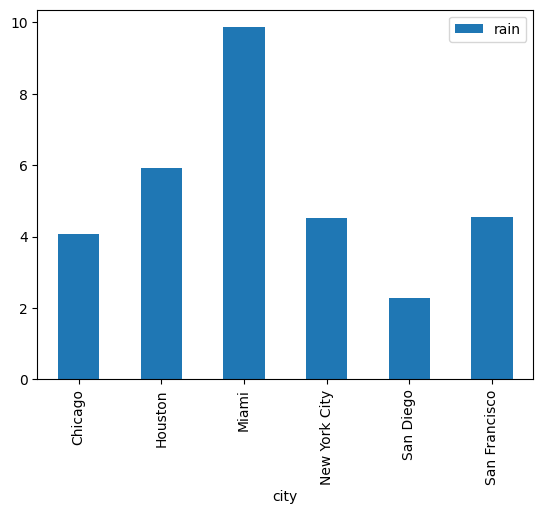

In [5]:
bar_chart = max_rainfall.plot.bar(x='city', y='rain')
bar_chart

In [9]:
month_city = alt.Chart(wth).mark_circle().encode(
    x = 'month:N',
    y = 'city:N',
    size = alt.Size('rain:Q', scale=alt.Scale(range=[10, 500]), legend=alt.Legend(title="Rainfall (mm)")),
    tooltip=['city', 'month', 'rain']
).properties(
    title="Cities with Rainfall Average per Month"
)
month_city.show()

alt.Chart(...)